<a href="https://colab.research.google.com/github/hakdj/teamproject2_final/blob/master/0916_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ÎèÑÍµ¨Î™®Ïùå

In [70]:
import re

In [ ]:
!pip install konlpy

In [72]:
!pip install beautifulsoup4

In [74]:
import nltk  # natural language toolkit
from nltk.tokenize import word_tokenize
import konlpy
from konlpy.tag import Okt
okt = Okt()
import pandas as pd
import numpy as np

### ÌååÏùº Í∞ÄÏ†∏Ïò§Í∏∞

In [11]:
df=pd.read_csv('./youtubecomment_bean12.csv',encoding='cp949')

In [12]:
df2=pd.read_excel('./youtube_exercisevideo.xlsx')

### ÌÖåÏä§Ìä∏ ÌååÏùº

In [62]:
#Ïù¥Î™®Ìã∞ÏΩò Ï†úÍ±∞
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

#Î∂ÑÏÑùÏóê Ïñ¥Í∏ãÎÇòÎäî Î∂àÏö©Ïñ¥Íµ¨ Ï†úÏô∏ (ÌäπÏàòÎ¨∏Ïûê, ÏùòÏÑ±Ïñ¥)
han = re.compile(r'[„Ñ±-„Öé„Öè-„Ö£!?~,".\n\r#\ufeff\u200d]')

In [63]:
commentlist = 'Ïû¨Ïû¨xÌÉ±Íµ¨xÌÇ§ Ï°∞Ìï© ÏÇ¨ÎûëÌï¥Ïó¨ ÏßÑÏßú „Ö†„Ö†„Ö†„Ö†„Öã„Öã„Öã„Öã„Öã Ïó≠Ïãú Î∂ÑÎüâÏ≤úÏû¨ ÎÑàÎ¨¥ ÏõÉÍ≤® „Ö†„Ö†„Ö†„Öã„Öã„Öã„Öã„ÖãÍ∞ÅÏû°Í≥† Ï∂∞Ï£ºÎäî ÌÉ±Íµ¨ ÏÜåÎßê Ï∂§ÏÑ†Ïóê ÏπòÏù¥Í≥† Í∞ëÎãàÎã§üíúÏóîÎî©ÏöîÏ†ï ÏñºÍµ¥ ÌÅ¥Î°úÏ¶àÏóÖÌï† Îïå ÏÉàÏÇº ÏôúÏù¥Î†áÍ≤å Ïù¥Îªê Îòê‚Ä¶?'

In [64]:
comment_result = []

tokens = re.sub(emoji_pattern,"", commentlist)
tokens = re.sub(han,"",tokens)
comment_result.append(tokens)

comment_result = pd.DataFrame(comment_result, columns=["comment"])

In [65]:
from konlpy.tag import Twitter

In [66]:
def get_noun(comment_txt):
    twitter = Twitter()
    # okt = Okt()
    noun = []
    
    if len(comment_txt)>0:
        tw = twitter.pos(comment_txt)
        for i,j in tw:
            if j == 'Noun':
                noun.append(i)
    return noun
 
comment_result['token'] = comment_result['comment'].apply(lambda x: get_noun(x))

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [67]:
comment_result['token']

0    [Íµ¨, ÌÇ§, Ï°∞Ìï©, ÏÇ¨Îûë, ÏßÑÏßú, Ïó≠Ïãú, Î∂ÑÎüâ, Ï≤úÏû¨, Ïû°Í≥†, Íµ¨, Îßê, Ï∂§ÏÑ†, Ïπò...
Name: token, dtype: object

## Î≥∏ ÌååÏùº

In [5]:
from konlpy.tag import Twitter # ÌïúÍ∏Ä ÌòïÌÉúÏÜå Ï∂îÏ∂ú
from collections import Counter # count
import nltk # natural language toolkit
from nltk.corpus import stopwords

### Ïù¥Î™®Ìã∞ÏΩò Ï†úÍ±∞

In [ ]:
#Ïù¥Î™®Ìã∞ÏΩò Ï†úÍ±∞
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)

#Î∂ÑÏÑùÏóê Ïñ¥Í∏ãÎÇòÎäî Î∂àÏö©Ïñ¥Íµ¨ Ï†úÏô∏ (ÌäπÏàòÎ¨∏Ïûê, ÏùòÏÑ±Ïñ¥)
han = re.compile(r'[„Ñ±-„Öé„Öè-„Ö£!?~,".\n\r#\ufeff\u200d]')

### Î≥∏ ÌååÏùº listÏóê Îã¥Í∏∞

In [ ]:
lists=[]
for i in range(0,len(df)):
  lists.append(df['note'][i])
lists

In [29]:
twitter = Twitter() 
morphs = [] 
for sentence in lists: 
    morphs.append(twitter.pos(sentence)) 

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


### dataFrameÏúºÎ°ú ÎßåÎì§Í∏∞

In [ ]:
comment_result = []
for i in range(0,len(df)):
  tokens = re.sub(emoji_pattern,"", list[i])
  tokens = re.sub(han,"",tokens)
  comment_result.append(tokens)

comment_result = pd.DataFrame(comment_result, columns=["comment"])
comment_result

### Î™ÖÏÇ¨ Ï†ÑÏ≤òÎ¶¨

In [43]:
noun_adj_adv_list=[] 
for sentence in morphs : 
    for word, tag in sentence : 
        if tag in ['Alpha'] and ("Îòê" not in word)and ("Îì±" not in word)and ("Ïïû" not in word)and ("ÏÉù" not in word)and ("Î•º" not in word)and ("Ïó¨Í∏∞" not in word)and ("Îã§Î•∏" not in word)and ("Ïòà" not in word)and ("ÏùÄ" not in word)and ("ÏúÑÌï¥" not in word)and ("Îã§Ïùå" not in word)and ("ÎåÄÌïú" not in word)and ("ÏïÑÏ£º" not in word)and ("Í∑∏" not in word)and ("ÎèÑÏõÄ" not in word)and ("ÏïΩ" not in word)and ("ÎïåÎ¨∏" not in word)and ("Ïó¨Îü¨" not in word) and ("Îçî" not in word) and ("Ïù¥" not in word) and ("Ïùò" not in word) and ("Î∞è" not in word) and ("Í≤É" not in word) and ("ÎÇ¥" not in word)and ("ÎÇò" not in word)and ("Ïàò"not in word) and("Í≤å"not in word)and("Îßê"not in word) : 
            noun_adj_adv_list.append(word) 
        if tag in ['Noun'] and ("Îòê" not in word)and ("Îì±" not in word)and ("Ïïû" not in word)and ("ÏÉù" not in word)and ("Î•º" not in word)and ("Ïó¨Í∏∞" not in word)and ("Îã§Î•∏" not in word)and ("Ïòà" not in word)and ("ÏùÄ" not in word)and ("ÏúÑÌï¥" not in word)and ("Îã§Ïùå" not in word)and ("ÎåÄÌïú" not in word)and ("ÏïÑÏ£º" not in word)and ("Í∑∏" not in word)and ("ÎèÑÏõÄ" not in word)and ("ÏïΩ" not in word)and ("ÎïåÎ¨∏" not in word)and ("Ïó¨Îü¨" not in word) and ("Îçî" not in word) and ("Ïù¥" not in word) and ("Ïùò" not in word) and ("Î∞è" not in word) and ("Í≤É" not in word) and ("ÎÇ¥" not in word)and ("ÎÇò" not in word)and ("Ïàò"not in word) and("Í≤å"not in word)and("Îßê"not in word) : 
            noun_adj_adv_list.append(word) 
print(noun_adj_adv_list)

['Î¶∞', 'Ï†ÑÎ∂Ä', 'ÏôÄÏ§ë', 'Í≥®Î™©', 'ÎßâÍ±∏Î¶¨', 'Ïö∞Î¶¨', 'Ïßë', 'ÏÑ∏', 'Ìï†Î®∏Îãà', 'ÏßÑÏßú', 'ÏöîÏÉà', 'Ìëπ', 'ÎçïÏßà', 'Îß§Ïùº', 'Ïå§', 'Ïú†Ìà¨Î∏å', 'ÎçïÎ∂Ñ', 'Í∞ÄÏ°±', 'ÏÑ†ÌÉù', 'Ìï≠ÏÉÅ', 'ÏñëÎ∞ò', 'Ïöî', 'ÏöîÏÉà', 'Ïû°Ï±Ñ', 'ÌôçÏñ¥', 'Î≥¥Í≥†', 'Î©∞Ïπ†', 'Ï†ÑÎùºÎèÑ', 'Amazing', 'I', 'really', 'wanna', 'try', 'this', 'at', 'home', 'Delicious', 'as', 'usual', 'Thank', 'you', 'always', 'Î∂Ñ', 'Savior', 's', 'Desciple', 'absolutely', 'God', 'Bless', 'Ïó≠Ïãú', 'Ï§Ñ', 'Ïò§Îäò', 'ÎßâÍ±∏Î¶¨', 'ÏΩ©Ï†Ñ', 'ÏöîÎ¶¨', 'ÌÉë', 'Ìï≠ÏÉÅ', 'ÏΩ©Ï†Ñ', 'Îßå', 'Î¶∞', 'ÏûêÎ¨∏', 'Ìï¥Ï£ºÏãú', 'Ïå§', 'ÏöîÎ¶¨', 'ÏòÅÏÉÅ', 'ÏÑ§', 'Ï∂îÍ∞Ä', 'Ïú†', 'Ìï≠ÏÉÅ', 'Ïå§', 'Î©ã', 'Ïú†', 'Î≥¥ÌÜµ', 'Ïßë', 'ÎØπÏÑúÍ∏∞', 'ÎåÄÌëú', 'Ï†ê', 'ÎåÄÌëú', 'ÏöîÎ¶¨', 'Î∂Ñ', 'ÏöîÏ¶ò', 'Î∞±Ï¢ÖÏõê', 'ÏòÅÏÉÅ', 'Ìï¥Î®π', 'Í±∞', 'ÏßÑÏßú', 'Ïïà', 'ÏΩ©', 'Ïì∞Í∏∞', 'ÏµúÍ≥†', 'ÎìØ', 'ÎπΩÏå§', 'ÏΩ©Ï†Ñ', 'Ï°¥Í≤Ω', 'ÏΩ©Ï†Ñ', 'ÎäêÎÇå', 'ÏãúÏûë', 'ÌïúÏßÄ', 'ÏñºÎßà', 'Î≤åÏç®', 'ÎßàÏßÄÎßâ', 'ÏãúÏ†ê', 'Ìù¨Îßù', 'Ï†ÑÏßÑ', 'ÎÇ†', 'Ï§ÄÎπÑ', 'Í∏∞Ïõê', 'Ì

In [44]:
from wordcloud import WordCloud # ÌÖçÏä§Ìä∏ ÏãúÍ∞ÅÌôî
import matplotlib.pyplot as plt # ÏãúÍ∞ÅÌôî Ìå®ÌÇ§ÏßÄ
import matplotlib 
from IPython.display import set_matplotlib_formats

#### ÎπàÎèÑÏ∂úÎ†•

In [86]:
count = Counter(noun_adj_adv_list)
words = dict(count.most_common())
print(words)

{'ÎïÖÏΩ©': 161, 'Î≤ÑÌÑ∞': 155, 'ÏΩ©': 120, 'Î†àÏãúÌîº': 58, 'ÎëêÎ∂Ä': 52, 'Îßõ': 45, 'Ïßë': 42, 'ÏöîÎ¶¨': 40, 'Ìï¥Î®π': 38, 'Ïöî': 37, 'Ï†Ä': 36, 'ÏΩ©Ï†Ñ': 34, 'Î∞±Ï¢ÖÏõê': 34, 'Í±∞': 30, 'ÌåÄ': 28, 'ÏßÑÏßú': 27, 'Î¨º': 26, 'ÏÜåÍ∏à': 25, 'Ìï¥': 24, 'Ïò§Îäò': 23, 'ÏòÅÏÉÅ': 23, 'Íº≠': 22, 'ÏÑ§ÌÉï': 22, 'Ìï≠ÏÉÅ': 21, 'Ï†Ñ': 21, 'ÎëêÏú†': 20, 'ÎåÄÏã†': 19, 'Ï¢Ä': 19, 'Î≥¥Í≥†': 18, 'ÎØπÏÑúÍ∏∞': 18, 'Îïå': 18, 'Ïö∞Î¶¨': 17, 'Ïå§': 17, 'ÎåÄÌëú': 17, 'Ìï¥Ïô∏': 17, 'Ïû¨Î£å': 17, 'Ïö∞Ïú†': 17, 'ÏùåÏãù': 15, 'Ìï¥ÎèÑ': 14, 'Ïô∏Íµ≠': 14, 'Ïó¨Î¶Ñ': 13, 'ÌïúÍµ≠': 13, 'the': 13, 'I': 12, 'Ïú†': 12, 'ÏÇ¨Îûå': 12, 'Í∞êÏÇ¨': 12, 'Î≠ê': 12, 'ÎπÑÏßÄ': 12, 'ÌôúÏö©': 12, 'ÎßâÍ±∏Î¶¨': 11, 'ÎπàÎåÄÎñ°': 11, 'ÏΩ©Í∞ÄÎ£®': 11, 'ÎßàÎ¶¨': 11, 'Î∂Ñ': 10, 'Îäò': 10, 'Ïôú': 10, 'ÌïúÎ≤à': 10, 'ÌôçÏ≤†': 10, 'ÎçïÎ∂Ñ': 9, 'ÎÇ†': 9, 'ÍπÄÏπò': 9, 'Î©îÎâ¥': 9, 'ÎùºÎ©¥': 9, 'Íµ≠Î¨º': 9, 'ÌÖî': 9, 'Í∞ÄÏ°±': 8, 'ÏöîÏ¶ò': 8, 'Í±¥Í∞ï': 8, 'ÏûêÏ£º': 8, 'Í≥†Í∏∞': 8, 'ÌôçÏßÑÌò∏': 8, 'Î≤à': 8, 'ÏΩ©Î¨º': 8, 'Î≤ï': 8, 'Íπ®': 8, 'Î©¥': 8

#### ÏãúÍ∞ÅÌôî

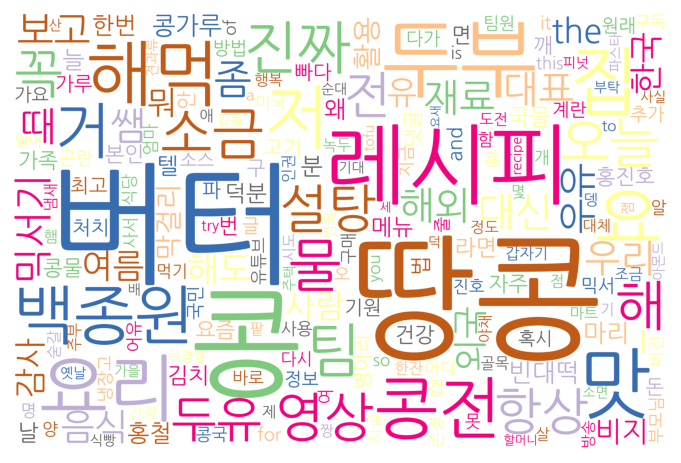

In [52]:
#word cloud show
matplotlib.rc('font',family = 'Malgun Gothic') 
set_matplotlib_formats('retina') 
matplotlib.rc('axes',unicode_minus = False)

wordcloud = WordCloud(font_path = '/content/Nanum.TTF', background_color='white',colormap = "Accent_r", width=4500, height=3000).generate_from_frequencies(words) 
plt.
plt.imshow(wordcloud) 
plt.axis('off') 
plt.show()

#### Í∑∏ÎûòÌîÑ

In [60]:
from collections import Counter
import matplotlib.pylab as plt2
import numpy as np

In [87]:
def get_noun(comment_txt):
    twitter = Twitter()
    # okt = Okt()
    noun = []
    
    if len(comment_txt)>0:
        tw = twitter.pos(comment_txt)
        for i,j in tw:
            if j == 'Noun':
                noun.append(i)
    return noun
 
comment_result['token'] = comment_result['comment'].apply(lambda x: get_noun(x))
type(comment_result)


/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


pandas.core.frame.DataFrame

In [89]:
comment_result.to_csv("./ÌÖåÏä§Ìä∏Ïö©.csv",index=False, encoding='CP949')

In [82]:
comment_result

comment                                              token
0                  Ïù¥Î∂ÑÏùÄ ÏöîÎ¶∞Ïù¥Îì§Ïù¥ ÏñºÎßàÎÇò ÏÜåÏã¨ÌïúÏßÄÎ•º Ï†ÑÎ∂Ä Íø∞Îö´ÏùÄ Í≤É Í∞ôÏïÑÏÑú Ï¢ãÎã§                                [Ïù¥Î∂Ñ, Î¶∞, ÏñºÎßàÎÇò, Ï†ÑÎ∂Ä, Í≤É]
1                      Í∑∏ÏôÄÏ§ëÏóê Í≥®Î™©ÎßâÍ±∏Î¶¨ÍπåÏßÄ Ï±ôÍ≤®Ï£ºÏãúÎäî Î∞±ÏÑ†ÏÉùÎãò  ÎåÄÎã®ÌïòÏã≠ÎãàÎã§                                 [ÏôÄÏ§ë, Í≥®Î™©, ÎßâÍ±∏Î¶¨, ÏÑ†ÏÉùÎãò]
2    Î∞±ÏÑ†ÏÉùÎãò Ïö∞Î¶¨Ïßë 80ÏÑ∏ Ìï†Î®∏ÎãàÍ∞Ä ÏßÑÏßú ÏöîÏÉà Ìëπ Îπ†ÏßÄÏÖîÏÑú ÏÑ†ÏÉùÎãò ÎçïÏßàÏùÑ ÌïòÏÑ∏Ïöî  Îß§Ïùº...  [ÏÑ†ÏÉùÎãò, Ïö∞Î¶¨, Ïßë, ÏÑ∏, Ìï†Î®∏Îãà, ÏßÑÏßú, ÏöîÏÉà, Ìëπ, ÏÑ†ÏÉùÎãò, ÎçïÏßà, Îß§Ïùº, Ïå§...
3    Amazing  I really wanna try this at home Delic...                                                 []
4    Ïù¥Îü∞ Î∂ÑÏù¥ Savior's Desciple absolutely  God Bless ‚ô°‚ô°‚ô°                                                [Î∂Ñ]
..                                                 ...                                                ...
652  ÏïÑÎ¨¥ÎÇòÏÑ†Ïñ∏Í∏∞Î∂ÑÏ¢ãÏùÄÍµ≠ÎØº1ÎåÄÏÑ†Ï∂úÎßàÏÑ†Ïñ∏Î¨∏ : Ï§ëÏÑúÎØºÏö© ÏöîÏ∂©ÏßÄÏæåÏ†ÅÎ∂ÑÏñëÍ≥µÍ≥µÏ£ºÌÉùÍ≥µÍ∏â Ï§ëÏöîÌïúÍ±¥Î≤Ω...  [ÎÇòÏÑ†, Í∏∞Î∂Ñ, Íµ≠ÎØº, ÎåÄÏÑ†, Ï∂úÎßà, ÏÑ†Ïñ∏Î¨∏, Ï§ë, ÏÑúÎØº, Ïö©, ÏöîÏ∂©ÏßÄ, ÏæåÏ†Å, Î∂Ñ...
653  Promoting too much carb makes Korean people a ...                                                 []
654  Ìï≠ÏÉÅ ÌÖîÎ†àÎπÑÏ†Ñ Î∞©ÏÜ° ÏûêÎßâÎ≥¥Î©¥ Í≥ÑÎûÄÏùÑ Îã¨Í±ÄÎ°úÏïºÏ±ÑÎ•º Ï±ÑÏÜåÎ°ú Î∞îÍøîÏÑú Ï†ÅÎçòÎç∞ Î∞±Ï¢ÖÏõêÏî®Ï≤òÎüº ...  [Ìï≠ÏÉÅ, ÌÖîÎ†àÎπÑÏ†Ñ, Î∞©ÏÜ°, ÏûêÎßâ, Í≥ÑÎûÄ, Îã¨Í±Ä, ÏïºÏ±Ñ, Ï±ÑÏÜå, Î∞±Ï¢ÖÏõê, ÏòÅÌñ•Î†•, Î∂Ñ...
655                            Î∞©ÏÜ°ÏóêÏÑú ÌåîÏû•Ï¢Ä ÎÅºÏßÄÎßàÎùº Ïó≠Í≤πÎã§ Í±∞ÎßåÌï¥Î≥¥Ïó¨                                       [Î∞©ÏÜ°, Ïû•Ï¢Ä, Í±∞Îßå]
656  Ïù¥Ï±ÑÎÑêÏóê Ïó∞Í≤∞Îêú Ï±ÑÎÑêÏóê Ï§ëÍµ≠Ïù∏Í∞ÑÏ≤©Îì§ Î™®ÎëêÏóêÍ≤å Î≥∏Ïù∏ Î∞∞Ïö∞Ïûê Î≥∏Ïù∏Îì§ Ìè¨Ìï®Ìïú Í∞ÄÏ°±3ÎåÄÏôÄ ...  [Ïù¥Ï±ÑÎÑê, Ïó∞Í≤∞, Ï±ÑÎÑê, Ï§ëÍµ≠Ïù∏, Í∞ÑÏ≤©, Î™®Îëê, Î≥∏Ïù∏, Î∞∞Ïö∞Ïûê, Î≥∏Ïù∏, Ìè¨Ìï®, Í∞ÄÏ°±...

[657 rows x 2 columns]

In [ ]:
noun_list = []
for i in range(len(comment_result)):
    for j in range(len(comment_result['token'].iloc[i])):
        noun_list.append(comment_result['token'].iloc[i][j])
        
counts = Counter(noun_list)
tags = counts.most_common(15)

#bar chart
test = pd.DataFrame({'word':[],
                    'count':[]})
for i in range(len(tags)):
    word = tags[i][0]
    count = tags[i][1]
    
    insert_data = pd.DataFrame({'word':[word],
                                'count':[count]})
    test = test.append(insert_data)

test.index = range(len(test))

index = np.arange(len(test))
plt2.bar(index,test['count'].tolist() )
plt2.xlabel('word', fontsize=5)
plt2.ylabel('count', fontsize=5)
plt2.xticks(index, test['word'].tolist(), fontsize=5, rotation=30)
plt2.title('Îã®Ïñ¥ ÎπàÎèÑÏàò ÏãúÍ∞ÅÌôî')
plt2.show()

### ÎßêÎ≠âÏπò Ï∂îÍ∞Ä

In [92]:
from konlpy.tag import Kkma
from konlpy.utils import pprint

In [96]:
kkma = Kkma()

In [99]:
pprint(kkma.sentences(comment_result['comment'][1]))

['Í∑∏ ÏôÄÏ§ëÏóê Í≥®Î™© ÎßâÍ±∏Î¶¨ÍπåÏßÄ Ï±ôÍ≤® Ï£ºÏãúÎäî Î∞± ÏÑ†ÏÉùÎãò ÎåÄÎã®ÌïòÏã≠ÎãàÎã§']


In [100]:
pprint(kkma.words(comment_result['comment'][1]))

AttributeError: ignored

* Îã®Ïñ¥ Ï∂îÍ∞ÄÌï† Í≤É ÎÑ£Í∏∞: ÏÑ†ÌÉùÌï¥ÏÑú
 * ex) ÎπΩÏÉò, ÏâΩÎã§
 * Îì±Îì± ÏÑ†ÌÉùÌï¥ÏÑú 20Í∞úÏ†ïÎèÑÎßå Ìï¥Î≥¥Í∏∞